# 数据读取及可视化

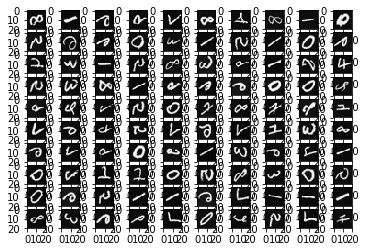

In [13]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
from random import sample
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg
from scipy.special import expit
raw_data = loadmat('ex3data1.mat')
X = np.mat(raw_data['X'])
y = np.mat(raw_data['y'])
m = len(y)
plt.figure()
sample_num = 100
idx = sample(range(0,m), sample_num)
for i in range(0, sample_num):
    plt.subplot(10, 10, i+1)
    plt.imshow(X[idx[i],:].reshape((20,20)), cmap='gray')
plt.show()

# 一对多分类的实现

In [14]:
def J(x, *args):
    X = args[0]
    y = args[1]
    h_theta = expit(X*x)
    return ((-np.log(h_theta.T)*y - np.log(1-h_theta.T)*(1-y)) / len(y))[0,0]

def grad(x, *args):
    X = args[0]
    y = args[1]
    h_theta = expit(X*x)
    return X.T * (h_theta-y) / len(y)
theta = np.zeros((3,1),)
xopt, fopt, func_calls, grad_calls, warnflag, allvecs = fmin_cg(f=J, x0=theta, fprime=grad, args=(X,y), maxiter=50, full_output=True)

ValueError: shapes (5000,400) and (1,3) not aligned: 400 (dim 1) != 1 (dim 0)